In [11]:
import numpy as np
import skimage.io
import skimage.viewer
import matplotlib.pyplot as plt
import ipympl
from PIL import Image
from scipy import ndimage as ndi

In [12]:
%matplotlib widget
img = skimage.io.imread(fname="..\MyPic.jpeg")

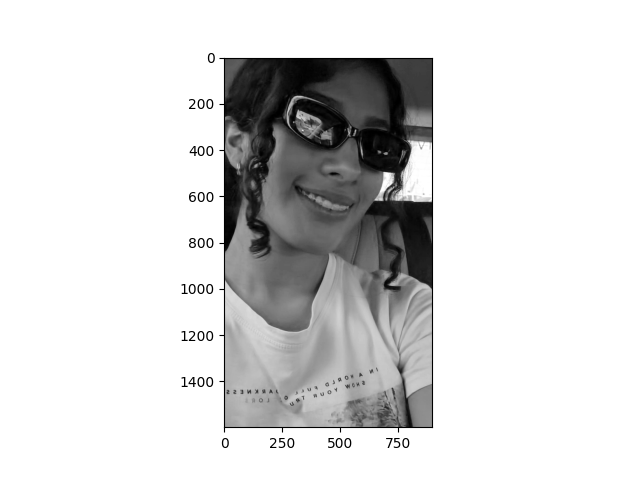

In [13]:
image = img[:,:,1]
w, h = image.shape
plt.imshow(image, cmap="gray")

In [14]:
mat_identity = np.array([[1,0,0],[0,1,0],[0,0,1]])
image1 = ndi.affine_transform(image, mat_identity)

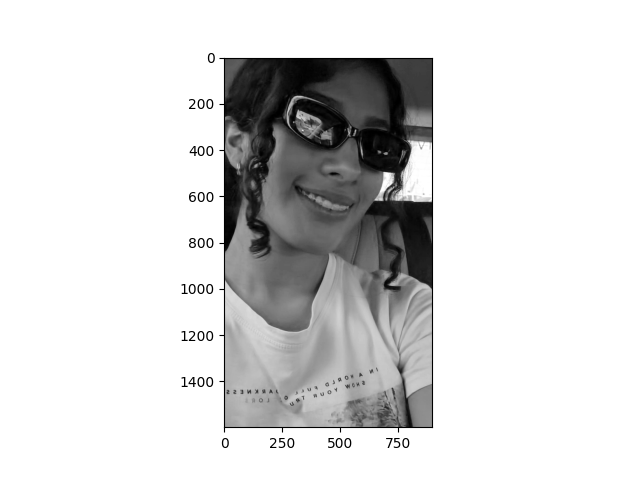

In [15]:
%matplotlib widget
plt.imshow(image1, cmap="gray")

In [16]:
s_x, s_y = 1.5, .5
mat_scale = np.array([[s_x,0,0],[0,s_y,0],[0,0,1]])
image2 = ndi.affine_transform(image, mat_scale)

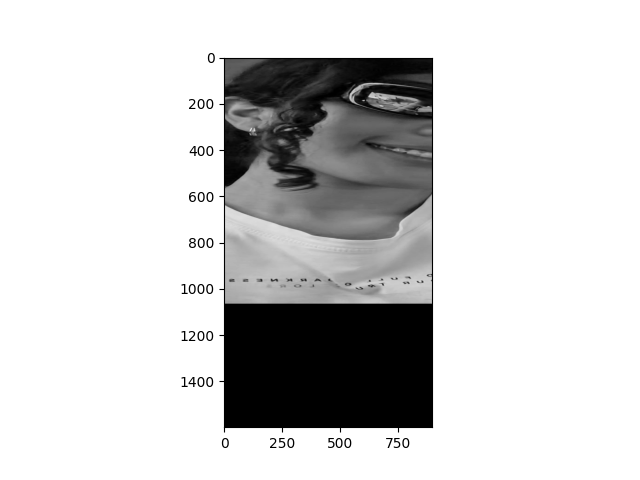

In [17]:
%matplotlib widget
plt.imshow(image2, cmap="gray")

In [18]:
mat_reflect = np.array([[1,0,0],[0,-1,0],[0,0,1]]) @ np.array([[1,0,w/2],[0,1,-h],[0,0,1]])
image3 = ndi.affine_transform(image, mat_reflect) # offset=(0,h)

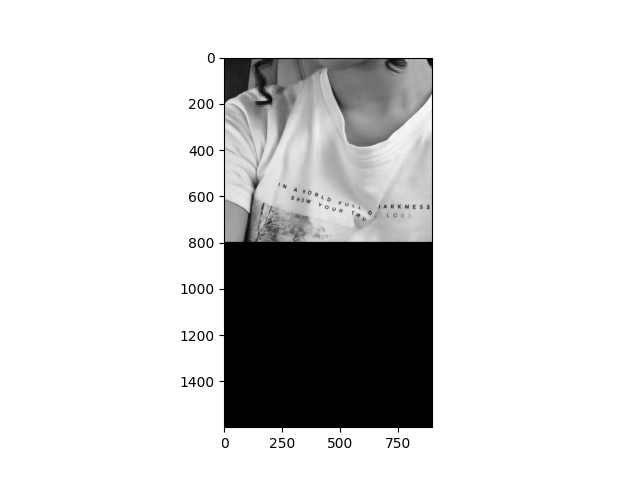

In [19]:
%matplotlib widget
plt.imshow(image3, cmap="gray")

In [20]:
theta = np.pi/6
mat_rotate = np.array([[1,0,w/2],[0,1,h/2],[0,0,1]]) @ np.array([[np.cos(theta),np.sin(theta),0],[np.sin(theta),-np.cos(theta),0],[0,0,1]]) @ np.array([[1,0,-w/2],[0,1,-h/2],[0,0,1]])
image4 = ndi.affine_transform(image, mat_rotate)

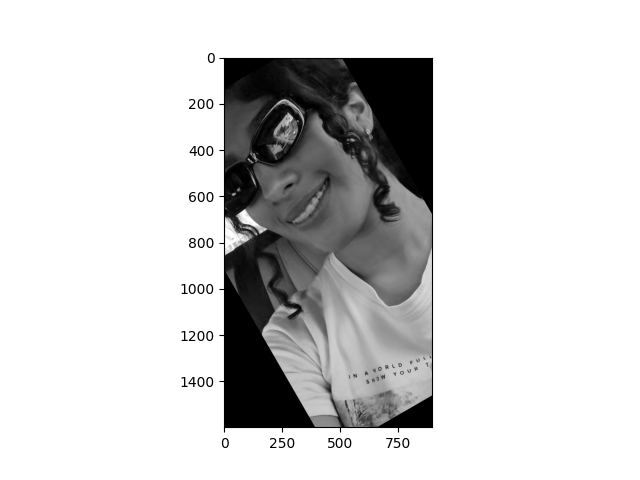

In [21]:
%matplotlib widget
plt.imshow(image4, cmap="gray")

In [22]:
lambda1 = 0.5
mat_shear = np.array([[1,lambda1,0],[lambda1,1,0],[0,0,1]])
image5 = ndi.affine_transform(image, mat_shear)

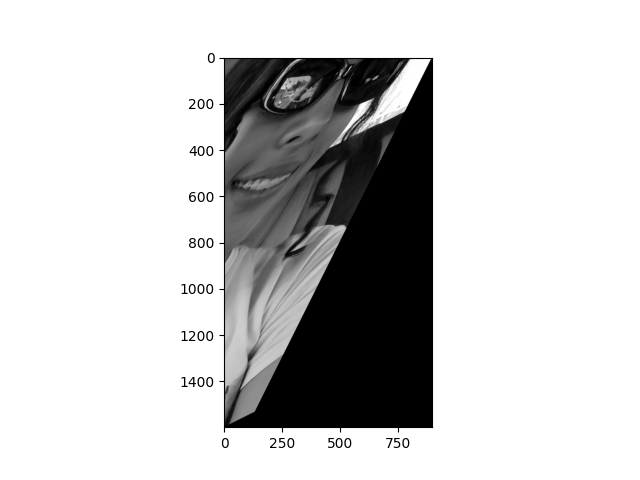

In [23]:
%matplotlib widget
plt.imshow(image5, cmap="gray")

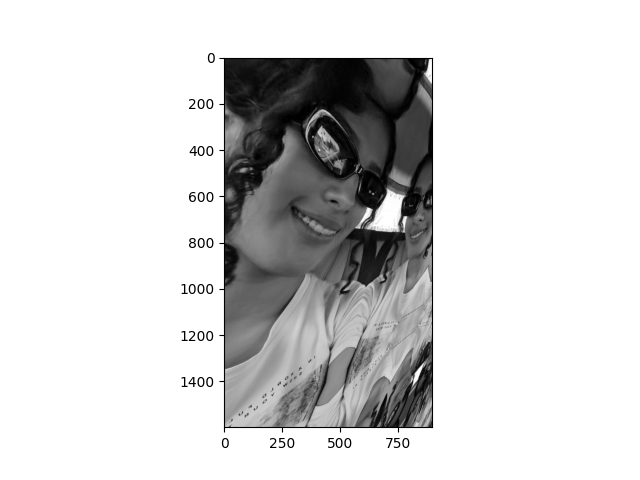

In [24]:
from skimage import transform

points_of_interest = np.array([[360, 110], 
                               [420, 270], 
                               [130, 400], 
                               [100, 280]])

projection = np.array([[500, 200],
                       [500, 390],
                       [100, 390],
                       [100, 200]])

tform = transform.estimate_transform('projective', points_of_interest, projection)
image6 = transform.warp(image, tform.inverse, mode = 'symmetric')

%matplotlib widget
plt.imshow(image6, cmap="gray")